# MACHINE LEARNING AND STATISTICS PROJECT

## THE BOSTON HOUSE PRICES DATASET

## HUGH O'REILLY

## H.DIP Data Analytics GMIT


## INTRODUCTION

 

___

The Boston Housing Dataset consists of information derived from US census data of housing in the Boston Mass. area of the US. The publication originally discussed the problems associated with the use of housing market data to measure the willingness to pay for clean air.

The data was originally published by Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Ref [https://www.sciencedirect.com/science/article/abs/pii/0095069678900062%5D]
___

## PROBLEM STATEMENT

**We would like to determine if there is a significant difference in the median house prices between houses that are along the Charles River and those which aren't**

#TODO Insert image of boston

## IMPORT AND SORT THE DATASET

___


In [101]:
#IMPORT LIBRARIES

#Scipy Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import keras as kr
%matplotlib inline

#IMPORT THE BOSTON HOUSE PRICES DATASET from sklearn
   
from sklearn.datasets import load_boston
boston = load_boston()

# Display the shape of the dataset
print(boston.data.shape)

# Ref [2]


(506, 13)


### Investigate the Dataset type
___

In [102]:
#Determine the dataset type

type(boston)

sklearn.utils.Bunch

The `type(boston)` command tells us that the dataset is a `sk.utils.Bunch` dataset type

A 'bunch' dataset type:  Dictionary-like object, the interesting attributes are: ‘data’, the data to learn, ‘target’, the classification labels, ‘target_names’, the meaning of the labels, ‘feature_names’, the meaning of the features, ‘DESCR’, the full description of the dataset, ‘filename’. 

Ref [https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html]

In [103]:
#Display a desciption of the dataset

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The Data consists of 506 rows and 13 columns i.e. 506 instances conatining 13 numeric/categorical variables as described above. 

In [104]:
# Show the first 10 rows of the Dataset
bos = pd.DataFrame(boston.data)
bos.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


It can be seen above that the dataset has no feature labels which will need to be added (although they are imported in the 'dataset characteristics'). In order to do so we need to use the `pandas.dataframe.keys()` command to access the keys and then assign them to the attribute columns.

Ref [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.keys.html]

In [105]:
# Identify the indices in the dataset

bos.keys()

RangeIndex(start=0, stop=13, step=1)

In [106]:
#Passing the `feature_names` parameter to the dataset now assigns the attributes with their labels

bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Only 13 attributes are shown, although 14 attributes are associated with the dataset. The 14th attribute, or target variable - MEDV     Median value of owner-occupied homes in $1000's must be added to the `bos` pandas array

In [107]:
#The price is identified as the target variable above so we will see if is there

boston.target #This prints the array of target variables (MEDV)

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [108]:
#We now add the target variable (MEDV) to the array as 'price'

bos['PRICE'] = boston.target
print(bos.head())

#ref [https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef]

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## DESCRIPTIVE STATISTICS
___

In [109]:
#Table with summary statistics of the dataset

bos.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Selected Observations from the Summary Stats Table
___

* **The target variable - 'PRICE' has a range of $5000 - $50000 with a mean of $22,532 which is a significant variation in house prices across the city.**


* The 'CHAS' variable - proximity to the Charles River is logisitic in nature (i.e. 1 or 0)


* Per Capita crime rate varies significantly across the city from 0.00632 to 88.9762

### Distribution of Prices Data
___

In [110]:
#Set the target variable to y

y = bos['PRICE']*1000

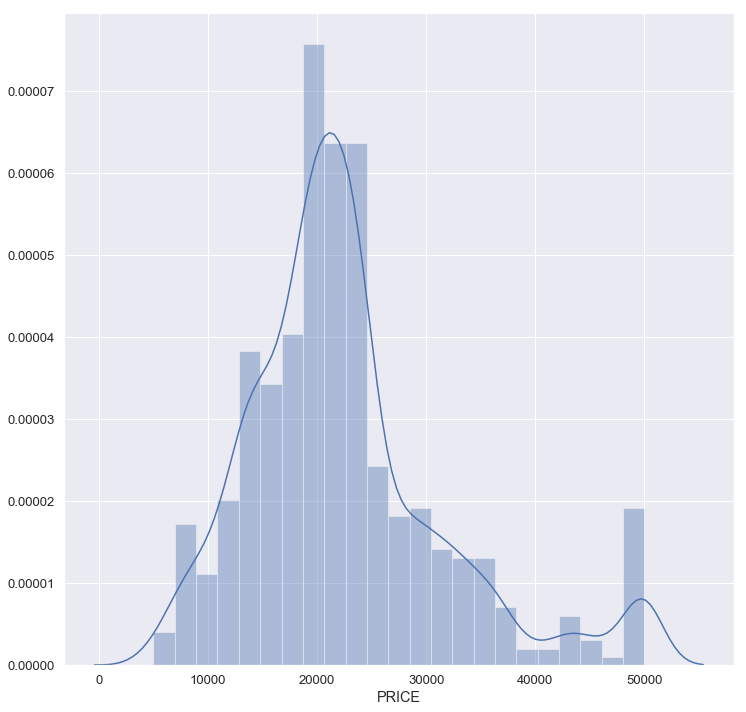

In [111]:
#Use the Seaborn library to display the distribution of house prices
sns.set_style("darkgrid")
plt.figure(figsize=(12, 12))
ax.set_title('House Prices', size=20)
ax = sns.distplot(y)

The plot above which displays the distribution of house prices in the dataset 'appears' to follow a **normal distribution.**

**Some other observations**

* The highest distribution is centred approximately around the mean ($20,000)

* There are a notably high number of houses around the max ($50,000)

Although the prices 'look' like they follow a normal distribution i.e. a bell-curve or gaussian distribution, it would be prudent to definitively determine the distribution as the distribution of the data will determine what inferential statistical analysis should be carried out.- **we will next carry out a test for normality.**

**Shapiro-Wilk Test for Normality**

The Shapiro-Wilk test tests the null hypothesis $H_0$ that the sample comes from the normal distribution. Therefore at a significance level of 0.05 a $p$ < 0.05 indicates non-normality
Ref[http://www.bios.unc.edu/~mhudgens/bios/662/2008fall/Backup/wilkshapiro1965.pdf]

In [112]:
from scipy.stats import shapiro #import the Shapiro-Wilks function

shapiro_test = shapiro(y) #run the Shapiro Wilks tets on the house price data

stat, p = shapiro_test
print('Test Statistic=%.3f, p=%.4f' % (stat, p))

Test Statistic=0.917, p=0.0000


The Shapiro-Wilk test above *rejects* the null hypothesis since the *p* value is less than 0.05, therefore the data for 'PRICE' is not normally distributed. In addition the test statistic is 0.917 which indicates that this result is likely valid and not a type 1 error. Further visualisation may be carried out using a **Q-Q plot**

A Q-Q plot plots quantiles (values that split a data set into equal portions of the data) against the theoretical quantiles of a normal distribution. 

Ref[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/?source=post_page-----6bf06ed646a9----------------------]

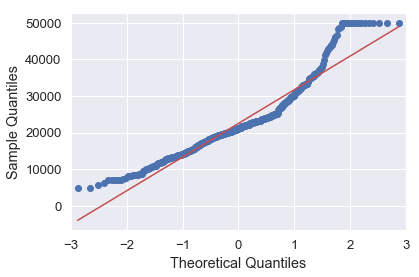

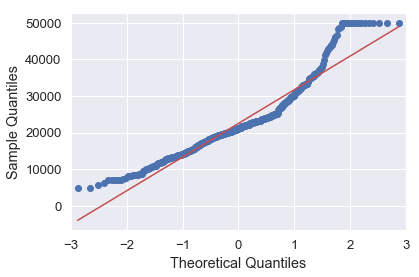

In [113]:
sm.qqplot(y, line='s') #generate a q-q plot of the house price data

Investigating possible reasons for the non-normality of the 'PRICES' data and specifically what, if any effects are causing the skew of data towards higher value houses may be worthwhile.

### Relationships Between Variables
___

A correlation heatmap is a useful way to quickly visualise the relationships between variables and determine which variables are highly correlated and worth further investigation.

Ref [https://seaborn.pydata.org/generated/seaborn.heatmap.html]


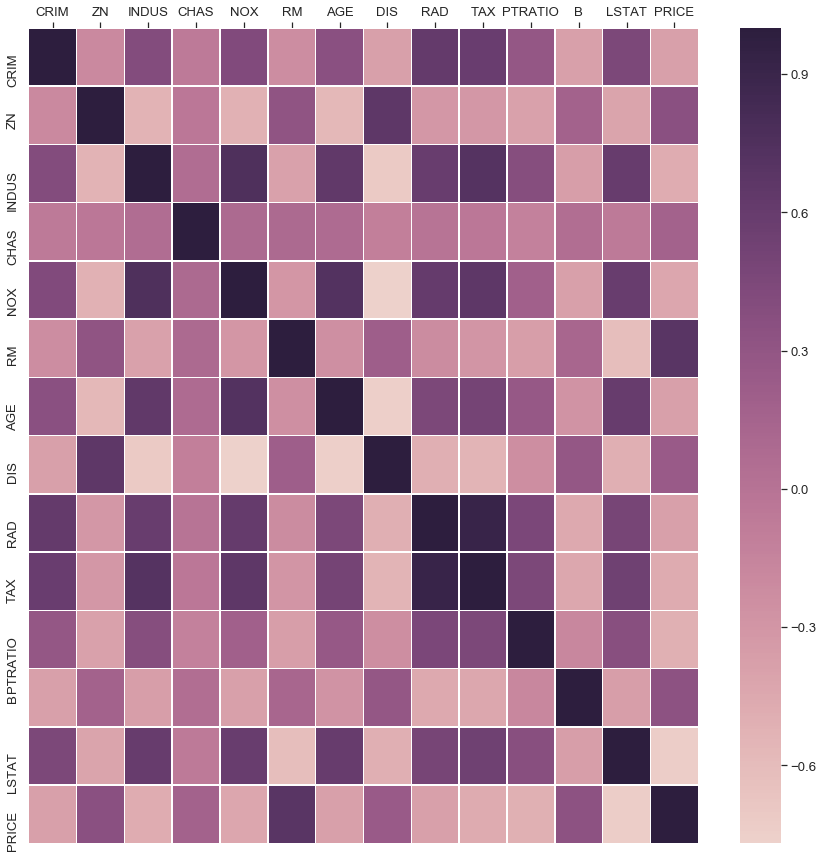

In [114]:
plt.figure(figsize=(15, 15)) #sets the parameters for the figure size 
ax = sns.heatmap(bos.corr(), cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5) #generates heatmap, colour scheme and linewidth
ax.xaxis.tick_top() #sets the axis to the top of the chart for easier reading

The above correlation matrix highlights some interesting relationships between the target variable, PRICE and other variables:

* There is a high positive correlation between PRICE and RM - (Average number of rooms per dwelling)

* There is a negative correlation between PRICE and LSTAT - (% lower status of the population)

The correlation matrix is only relevant to variables where there is a integer value. The Charles river variable is logistic in nature (i.e. 1 or 0) so is not relevant to this analysis.

## INFERENTIAL STATISTICS

We will now use inferential statistics to analyse the relationship between the median house prices 'PRICE' ('MEDV'in the original dataset) and whether or not the houses border the Charles river 'CHAS'

In [115]:
# Split the data into house proces which border the River and those who dont
    
River = bos.loc[bos['CHAS'] != 0]
Not_River = bos.loc[bos['CHAS'] != 1]

In [116]:
#Create 2 Arrays of Prices along River and not along river

River_Price = River['PRICE']
Not_River_Price = Not_River['PRICE']

In [117]:
#Summary statistics for house prices bordering river
River_Price.describe().T


count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: PRICE, dtype: float64

In [118]:
#Summary statistics for house prices not bordering river
Not_River_Price.describe().T

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: PRICE, dtype: float64

I can be seen above that in simple terms, the mean house price of houses bordering the river is 28,440 dollars whereas the mean house price of houses not bordering the river is 22,093 dollars.

We will take a further look at how both sets of prices are distributed, using boxplots

### BOX PLOTS OF HOUSE PRICES BORDERING/NOT BORDERING RIVER

Text(0.5,1,'House Prices Not Bordering River and Bordering River')

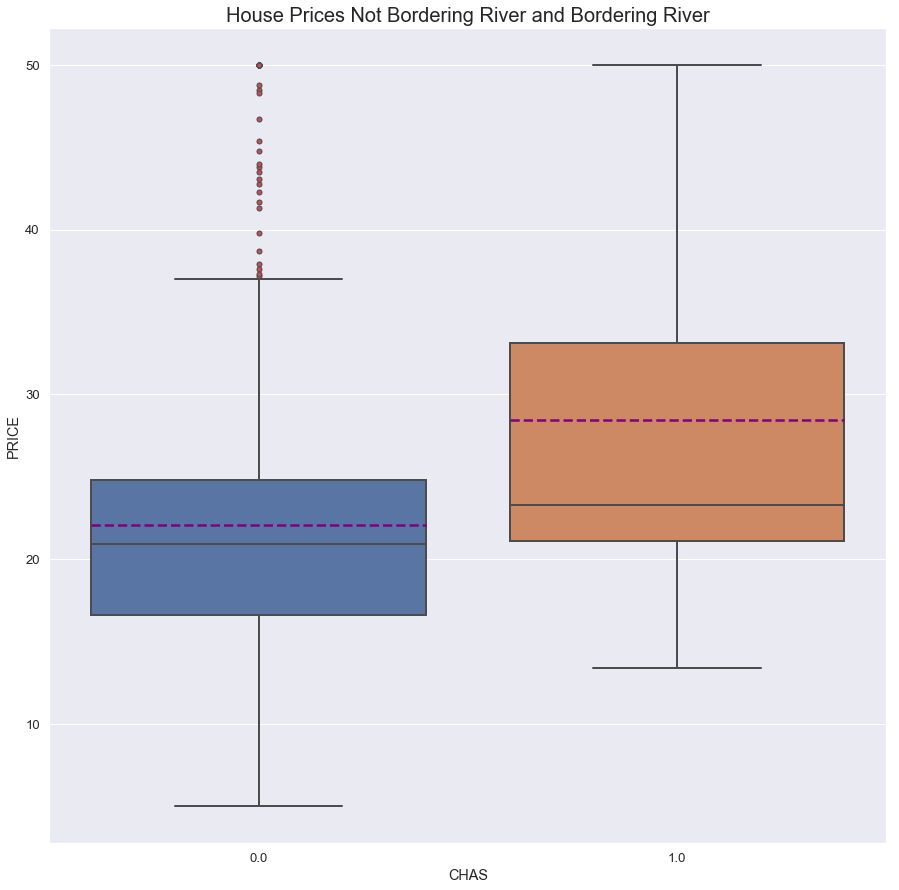

In [119]:
plt.figure(figsize=(15, 15))
red_circle = dict(markerfacecolor='r', marker='o')
sns.set(font_scale=1.2)
ax=sns.boxplot(x="CHAS", y="PRICE",data=bos, linewidth=2.0, flierprops=red_circle, showmeans=True , meanline=True, meanprops = dict(linestyle='--', linewidth=2.5, color='purple'))
ax.set_title('House Prices Not Bordering River and Bordering River', size=20)


The boxplots of the median house price for houses bordering the river (CHAS=1) and those not bordering the river (CHAS=0) appear quite different, suggesting that it may be worth investigating if this difference is statistically significant.
* The array containing houses not bordering the river has a number of outliers at the upper end
* The array containing houses bordering the river has a mean which is higher than those not bordering the river (**purple dashed line in boxplot**). Additionally, the mean of house prices bordering the river is significantly higher than the median compared to the house prices of those not bordering the river.

### DISTRIBUTION PLOTS OF HOUSE PRICES BORDERING/NOT BORDERING RIVER

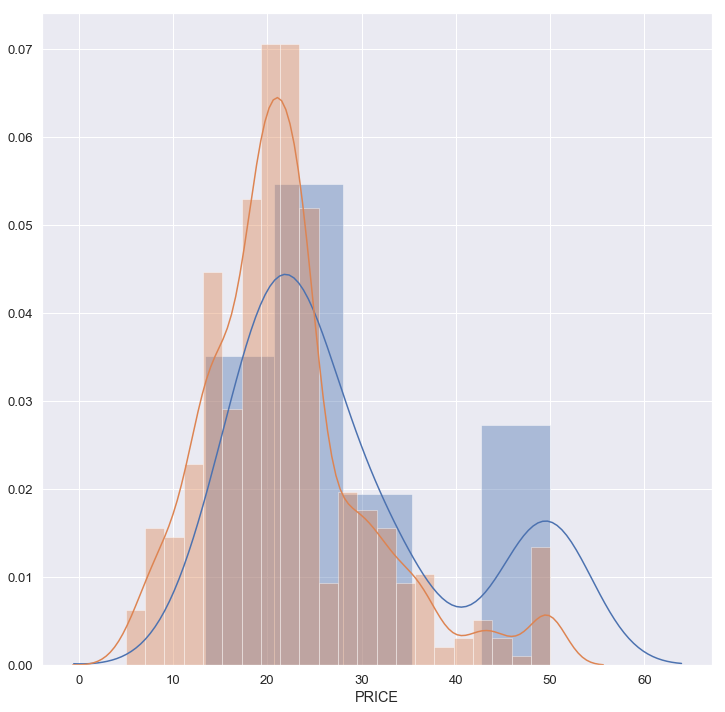

In [120]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 12))
ax1 = sns.distplot(River_Price)
ax2 = sns.distplot(Not_River_Price)

The distribution plots of house prices bordering/not bordering the river don't highlight the differences in the two datasets as well as the boxplots do, but the distributions illustrate how both distributions have a similar shape

### NORMALITY CHECK ON HOUSE PRICES BORDERING/NOT BORDERING RIVER

In [121]:
#Check the two house price data sets for normality using the Shapiro-Wilks test

shapiro_test1 = shapiro(Not_River_Price) 
shapiro_test2 = shapiro(River_Price) 

stat1, p1 = shapiro_test1
stat2, p2 = shapiro_test2
print('Test Statistic : Not Bordering River =%.3f, p=%.4f' % (stat1, p1))
print('Test Statistic : Bordering River =%.3f, p=%.4f' % (stat2, p2))

Test Statistic : Not Bordering River =0.928, p=0.0000
Test Statistic : Bordering River =0.836, p=0.0001


The normality test of the house prices bordering/not bordering the river both suggest that we can reject the null hypothesis, $H_0$, and accept the alternative hypothesis, $H_1$, the two sets are non-normal

**Although the data displays non-normality, (and the presence of outliers) - parametric tests of the house prices are still suitable due to the large sample sizes we have** 

REF [https://blog.minitab.com/blog/understanding-statistics/data-not-normal-try-letting-it-be-with-a-nonparametric-hypothesis-test]

### PAIRED T-TEST

In [122]:
#Carry out a paired t-test on the house prices bordering/not bordering the river

stats.ttest_ind(Not_River_Price, River_Price)

stat, p = stats.ttest_ind(Not_River_Price, River_Price)
print('Test Statistic = %.3f, p=%.4f' % (stat, p))

Test Statistic = -3.996, p=0.0001


REF [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html]